# Sleep Event Detection
This notebook demonstrates how to use Sleep-Semantic-Segmentation to perform **single-channel sleep event detection**. It also shows a step-by-step description of the detection algorithm.
Please make sure to install the latest version of Sleep-Semantic-Segmentation first by typing the following line in your terminal or command prompt:
`pip install --upgrade wrap_sssm`

In [1]:
import mne
import yasa
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wrap_sssm.detection.detection import sleep_event_detect
sns.set(font_scale=1.2)
%matplotlib widget

## Loading data
As an example, we load sleep on a 500s single channel EEG data. The sampling rate is 100 Hz. 

In [2]:
# os.chdir(r"D:\code_cloud\new_eeg_deep\scut_eeg_dl\wrap_sssm\notebookes")
raw = mne.io.read_raw_edf('SC4001E0-PSG.edf', preload=True)

Extracting EDF parameters from D:\code_cloud\new_eeg_deep\scut_eeg_dl\wrap_sssm\notebookes\SC4001E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 7949999  =      0.000 ... 79499.990 secs...


## Preprocessing

In [3]:
raw.filter(0.1, 40)
data = raw.get_data(['EEG Fpz-Cz'], units="uV")
sf = 100
data = data[:,:50000]

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 3301 samples (33.010 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    1.3s finished


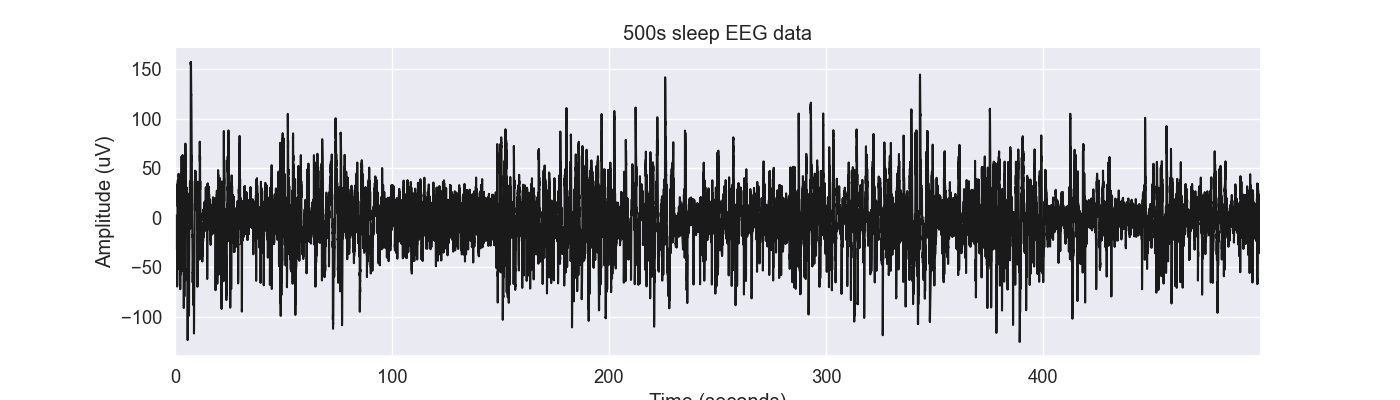

In [4]:
# Define sampling frequency and time vector
times = np.arange(data.shape[-1]) / sf

# Plot the signal
fig, ax = plt.subplots(1, 1, figsize=(14, 4))
plt.plot(times, data[0,:], lw=1.5, color='k')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude (uV)')
plt.xlim([times.min(), times.max()])
plt.title('500s sleep EEG data')
sns.despine()

## detect sleep event
Let's try to detect these two spindles using the [wrap_sssm.detection.detection.sleep_event_detect](https://sleep-semantic-segmentation.readthedocs.io/en/latest/_modules/wrap_sssm/detection/detection.html#sleep_event_detect) function. Here' we're using a minimal example, but there are many other optional arguments that you can pass to this function.

In [4]:
# Apply the detection using sss sleep_event_detect
sp = sleep_event_detect(data, sf)

C:\software\Anaconda\envs\py3.9\lib\site-packages\sssm\ssm.py:69: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:189.)
  return torch.from_numpy(sliding_window_sample).float().to(self.device)


In [5]:
# Display the results using .summary()
sp.summary()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
C:\software\Anaconda\envs\py3.9\lib\site-packages\wrap_sssm\detection\detection.py:410: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df.loc[index, "Peak"] = sp_pro
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]

Spindle
     Start  End  Duration label  predict_proba  epoch_id    Peak   Amplitude  \
0      NaN  NaN       NaN   NaN            NaN       NaN    4.77  147.489095   
2      NaN  NaN       NaN   NaN            NaN       NaN    7.27  127.009976   
4      NaN  NaN       NaN   NaN            NaN       NaN    9.07   52.570945   
9      NaN  NaN       NaN   NaN            NaN       NaN   14.96   70.782860   
10     NaN  NaN       NaN   NaN            NaN       NaN   16.16   44.703946   
..     ...  ...       ...   ...            ...       ...     ...         ...   
171    NaN  NaN       NaN   NaN            NaN       NaN  454.28  115.425418   
173    NaN  NaN       NaN   NaN            NaN       NaN  456.00   41.031386   
176    NaN  NaN       NaN   NaN            NaN       NaN  458.99  126.214557   
180    NaN  NaN       NaN   NaN            NaN       NaN  477.41   96.267510   
182    NaN  NaN       NaN   NaN            NaN       NaN  488.66   46.449325   

           RMS  AbsPower  RelPo

{'Spindle':      Start  End  Duration label  predict_proba  epoch_id    Peak   Amplitude  \
 0      NaN  NaN       NaN   NaN            NaN       NaN    4.77  147.489095   
 2      NaN  NaN       NaN   NaN            NaN       NaN    7.27  127.009976   
 4      NaN  NaN       NaN   NaN            NaN       NaN    9.07   52.570945   
 9      NaN  NaN       NaN   NaN            NaN       NaN   14.96   70.782860   
 10     NaN  NaN       NaN   NaN            NaN       NaN   16.16   44.703946   
 ..     ...  ...       ...   ...            ...       ...     ...         ...   
 171    NaN  NaN       NaN   NaN            NaN       NaN  454.28  115.425418   
 173    NaN  NaN       NaN   NaN            NaN       NaN  456.00   41.031386   
 176    NaN  NaN       NaN   NaN            NaN       NaN  458.99  126.214557   
 180    NaN  NaN       NaN   NaN            NaN       NaN  477.41   96.267510   
 182    NaN  NaN       NaN   NaN            NaN       NaN  488.66   46.449325   
 
            RMS

Hooray! The algorithm successfully identified the two spindles! 

The output of the spindles detection is a [SleepEventDetect](https://sleep-semantic-segmentation.readthedocs.io/en/latest/wrap_sssm.detection.html#wrap_sssm.detection.detection.SleepEventDetect) class, which comes with some pre-compiled functions (also called methods). For instance, the [summary](https://sleep-semantic-segmentation.readthedocs.io/en/latest/_modules/wrap_sssm/detection/detection.html#SleepEventDetect.summary) method returns a [dict] contained [pandas DataFrame](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dataframe) with all the detected sleep event and their properties.

In [6]:
sp.summary('Sawtooth')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
C:\software\Anaconda\envs\py3.9\lib\site-packages\wrap_sssm\detection\detection.py:410: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df.loc[index, "Peak"] = sp_pro
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]

,Start,End,Duration,label,predict_proba,epoch_id
42,12025,12175,150,Sawtooth,0.683544,0
46,13375,13475,100,Sawtooth,0.696941,0
48,13975,14275,300,Sawtooth,0.745709,0


## Plot an overlay of our detected events
 Event_type is a list, select different sleep events, different  detected events could be plot on the data. [plot_detection](https://sleep-semantic-segmentation.readthedocs.io/en/latest/_modules/wrap_sssm/detection/detection.html#SleepEventDetect.plot_detection) 

interactive(children=(IntSlider(value=0, description='Epoch:', layout=Layout(align_items='center', justify_con…

<function wrap_sssm.detection.detection.SleepEventDetect.plot_detection.<locals>.update(epoch, amplitude, win_size)>

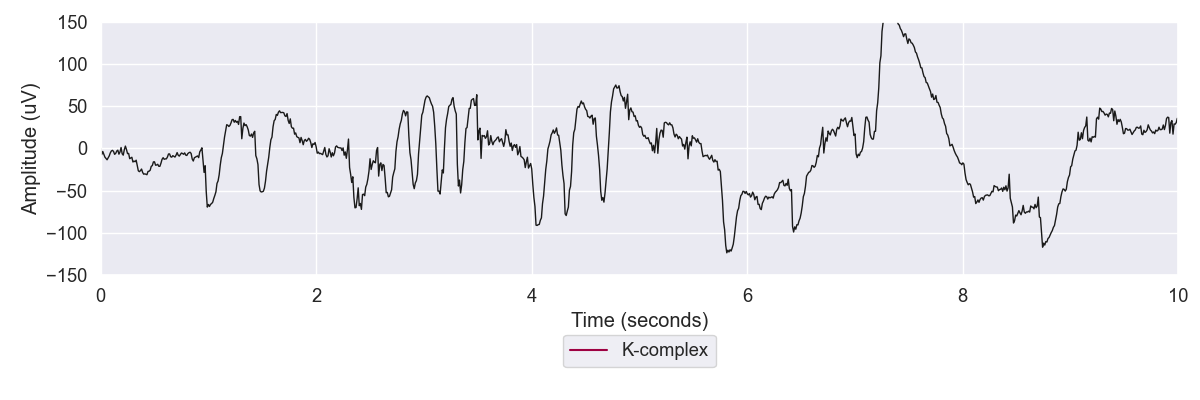

In [7]:
sp.plot_detection(event_type=['K-complex'])

## Plot average of  detected events
 Event_type is a list, select different sleep events, different  detected events could be plot. [plot_average](https://sleep-semantic-segmentation.readthedocs.io/en/latest/_modules/wrap_sssm/detection/detection.html#SleepEventDetect.plot_average) 

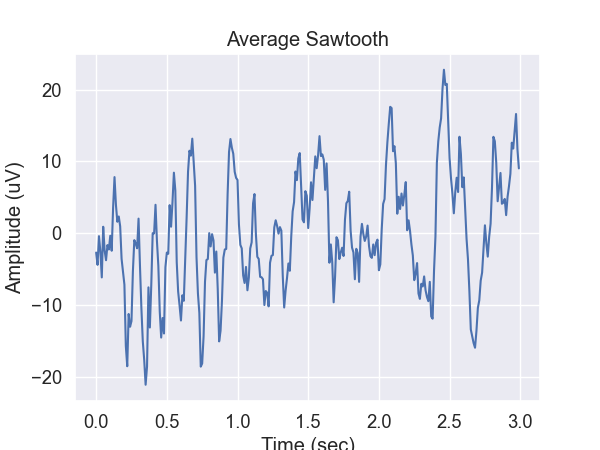

In [8]:
figure = sp.plot_average(event_type=['Sawtooth'])
plt.show()

## Logging

SSS uses the [logging](https://docs.python.org/3/library/logging.html) module to selectively print relevant messages. The default level of the logger is set to "WARNING", which means that a message will only be displayed if a warning occurs. However, you can easily set this parameter to "INFO" to get some relevant infos about the detection pipeline and the data.

This can be useful to debug the detection and/or if you feel that the detection is not working well on your data.

In [20]:
sp = sleep_event_detect(data, sf,verbose='info')
sp.summary()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
C:\software\Anaconda\envs\py3.9\lib\site-packages\wrap_sssm\detection\detection.py:395: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df.loc[index, "Peak"] = sp_pro
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]

Spindle
     Start  End  Duration label  predict_proba  epoch_id    Peak   Amplitude  \
0      NaN  NaN       NaN   NaN            NaN       NaN    4.77  147.489095   
2      NaN  NaN       NaN   NaN            NaN       NaN    7.27  127.009976   
4      NaN  NaN       NaN   NaN            NaN       NaN    9.07   52.570945   
9      NaN  NaN       NaN   NaN            NaN       NaN   14.96   70.782860   
10     NaN  NaN       NaN   NaN            NaN       NaN   16.16   44.703946   
..     ...  ...       ...   ...            ...       ...     ...         ...   
171    NaN  NaN       NaN   NaN            NaN       NaN  454.28  115.425418   
173    NaN  NaN       NaN   NaN            NaN       NaN  456.00   41.031386   
176    NaN  NaN       NaN   NaN            NaN       NaN  458.99  126.214557   
180    NaN  NaN       NaN   NaN            NaN       NaN  477.41   96.267510   
182    NaN  NaN       NaN   NaN            NaN       NaN  488.66   46.449325   

           RMS  AbsPower  RelPo

{'Spindle':      Start  End  Duration label  predict_proba  epoch_id    Peak   Amplitude  \
 0      NaN  NaN       NaN   NaN            NaN       NaN    4.77  147.489095   
 2      NaN  NaN       NaN   NaN            NaN       NaN    7.27  127.009976   
 4      NaN  NaN       NaN   NaN            NaN       NaN    9.07   52.570945   
 9      NaN  NaN       NaN   NaN            NaN       NaN   14.96   70.782860   
 10     NaN  NaN       NaN   NaN            NaN       NaN   16.16   44.703946   
 ..     ...  ...       ...   ...            ...       ...     ...         ...   
 171    NaN  NaN       NaN   NaN            NaN       NaN  454.28  115.425418   
 173    NaN  NaN       NaN   NaN            NaN       NaN  456.00   41.031386   
 176    NaN  NaN       NaN   NaN            NaN       NaN  458.99  126.214557   
 180    NaN  NaN       NaN   NaN            NaN       NaN  477.41   96.267510   
 182    NaN  NaN       NaN   NaN            NaN       NaN  488.66   46.449325   
 
            RMS

### Execution time
The total execution time on a regular laptop is 10-20 ms per 15 seconds of data sampled at 100 Hz. Scaled to a full night recording, the computation time should not exceed 5-10 seconds per channel on any modern computers. Furthermore, it is possible to disable one or more threshold and thus speed up the computation. Note that most of the computation cost is dominated by the bandpass filter(s).